# COGS 108 - Final Project 

# Overview

Recreational parks serve as a facilities that provide the space for sports, leisure or cultural activities in a community. The point of this project is to figure out whether the location of these parks have anything to do with their quality. To be more specific, I will be paying close attention to the quality of parks in areas inhabited by communities of lower income versus quality of parks in areas inhabited by communities of higher income. After conducting an explorative analysis of this specific relation, it's clear that the quality of parks in areas inhabited by communities of lower income are much worse than the ones in areas inhabited by communities of higher income.

# Name & GitHub ID

- Name: Rahul Bhattacharya
- GitHub Username: rahulbh00

# Research Question

Does the quality of a recreational park depend on its location in cities where there is a stark difference in distribution of population based on wealth such as San Diego?

## Background and Prior Work

To start this project, the first thing to do is to research the overall income of different communities in the city of San Diego. This step will help us rank different communities on the basis of wealth. With the help of a cencus conducted through the United States Cencus Bureau by the American Community Survey (ACS), along with extrapolating U.S. Bureau of Labor Statistics data, Chris Kolmar and his team from Homesnacks ranked the wealthiest neighbourhoods in San Diego based on median household income level from highest to lowest in 2020(1). North City and Carmel Valley rank the top two richest neighbourhood with median household income greater than 146,000 dollars. Mountain View and Memorial rank the lowest with median household income less than 31,000 dollars. You can view the rest of the list using the first reference link below.

The next part of the project requires research on locations of recreational parks in San Diego to figure out the general placement of parks in the communities we've decided to focus on using the categorization based on community wealth from step one(3). This allows us to make sure we don't include neighbourhoods from step one that don't have any recreational parks because they would be irrelevant to the study.

The final step involves making sure these recreational parks have existing, legitimate reviews on Yelp which is what I will use to determine a recreational park's quality. This step takes little time because I have access to a dataset in this project that provides me with yelp reviews of these recreational parks. I simply did this as a part of my background research work to verify that I had legitimate data to work with beforehand(4).

A similar study includes the "determination of whether characteristics of community recreation center environments are associated with neighborhood income and children’s use of the centers" (McKenzie, 2014) which concluded that 
"centers in more affluent neighborhoods seemed to be better off with regard to facilities, amenities, and aesthetics/incivilities" (McKenzie, 2014)(2); which is in alignment with my hypothesis(5).

References (include links):
- 1)https://www.homesnacks.com/richest-neighborhoods-in-san-diego/
- 2)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4082954/
- 3)https://www.sandiego.gov/park-and-recreation/centers/map
- 4)https://www.yelp.com/search?cflt=recreation&find_loc=San+Diego%2C+CA
- 5)FinalProject_rahulbh00.ipynb

# Hypothesis


My hypothesis is that there exists better quality recreational parks in areas populated by richer communities than areas populated by poorer communities where such parks are more likely to be vandalized with graffiti, consist of equipment abused by young adults and adults who misuse the park for unintended purposes, filled with homeless people looking for shelter and other similar reasons.

# Dataset(s)

Ideally, apart from the dataset I'm using in this analysis which is listed below, my project would have benefitted from sorting the data using a second dataset which would include information of different San Diego neighbourhoods with recreational parks and their median household income. I could have made a custom dataset using the same information I found through my background work, but because I was not sure of the privacy and ethics terms of using the data, I decided not to create this dataset. Additionally, if the datasets being used included information of recreational parks at a national level, we might have been able to establish a more distintive correlation between quality and location of recreational parks. But, the datasets I'm using in my analysis have been limited to the city of San Diego.

The following dataset was provided by the instructor for the final project. 

Dataset 1:
- Dataset Name: Yelp
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_reviews.csv
- Number of observations: 2333

Yelp dataset contains 3 columns ('id', 'rating', 'text') and 2333 rows of data. The dataset contains information regarding the name of every park and recreational park in San Diego, their yelp rating and their yelp review consisting of a body of text.

# Setup

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
df_yelp = pd.read_csv('yelp_SD_reviews.csv')

In [3]:
df_yelp.head()

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."


# Data Cleaning

Removing any rows with missing values

In [4]:
df_yelp.dropna()

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."
...,...,...,...
2328,Petco Park,5,I have visited over 27 MLB Ballparks including...
2329,Ann D. L'Heureux Memorial Dog Park,4,No grass here but it's a great dog park. if yo...
2330,Ann D. L'Heureux Memorial Dog Park,3,"I love taking our cholate lab here, however, t..."
2331,Ann D. L'Heureux Memorial Dog Park,3,Pretty small dog park overall. The center of t...


Removing unecessary columns

In [5]:
df_yelp.drop('text', inplace = True, axis = 1)
df_yelp.head()

,id,rating
0,Balboa Park,5
1,Balboa Park,5
2,Balboa Park,5
3,Civita Park,5
4,Civita Park,5


Renaming columns appropriately

In [6]:
df_yelp = df_yelp.rename(columns = {'id':'Park', 'rating':'Rating'})
df_yelp.head()

,Park,Rating
0,Balboa Park,5
1,Balboa Park,5
2,Balboa Park,5
3,Civita Park,5
4,Civita Park,5


Removing all rows which do not contain information about RECREATIONAL parks

In [7]:
df_yelp = df_yelp[df_yelp.Park.str.contains('Recreation')]
df_yelp

,Park,Rating
63,Hilltop Park and Recreation Center,5
64,Hilltop Park and Recreation Center,4
65,Hilltop Park and Recreation Center,4
120,Scripps Ranch Recreation Center,5
121,Scripps Ranch Recreation Center,5
...,...,...
1816,Ocean Air Recreation Center,5
1817,Ocean Air Recreation Center,1
2191,Carmel Valley Recreation Center,4
2192,Carmel Valley Recreation Center,3


Checking for unexpected values

In [8]:
#count number of unique park names
print(len(df_yelp['Park'].unique()))
#Appropriate number, passed.

#check yelp ratings are between 1-5
print(all(i >= 0 and i <= 5 for i in df_yelp['Rating'].unique()))
#True = Values are valid, passed.

21
True


Grouping the information for ease of plotting and analysis

In [9]:
df_yelp = df_yelp.groupby(['Park'], as_index = False)['Rating'].sum()
df_yelp

,Park,Rating
0,Adams Avenue Recreation Center,10
1,Admiral Robinson Recreation Centre,15
2,Allied Gardens Recreational Center,13
3,Azalea Park and Recreation Center,8
4,Aztec Recreation Center,12
5,Carmel Valley Recreation Center,12
6,Elfin Forest Recreational Reserve,12
7,Encanto Recreation Center,11
8,Hilltop Park and Recreation Center,13
9,Kearny Mesa Park & Recreation Center,12


# Data Analysis & Results

A general understanding of the data by looking at its average values and general trend.

In [11]:
df_yelp.describe()

,Rating
count,21.000000
mean,11.761905
std,1.786190
min,8.000000
25%,11.000000
50%,12.000000
75%,13.000000
max,15.000000


Creating a plot of Parks vs. Ratings (Core of Analysis)

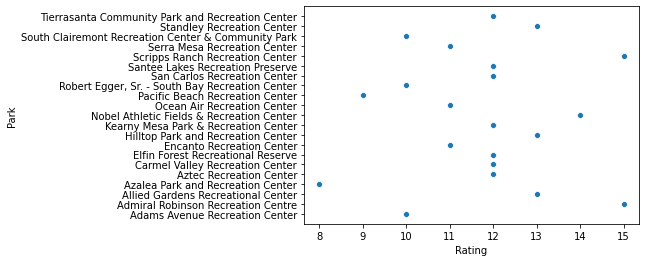

In [22]:
plot = sns.scatterplot(x = 'Rating', y = 'Park', data = df_yelp)

# Ethics & Privacy

The dataset used in my analysis was provided for use in the final project by the instructor, so I had permission to use it. As stated in the Dataset(s) section, the only place of concern where privacy could be potentially violated would be if I made a custom dataset using the data found during my background research of the ranking of neighbourhoods in San Diego based on median household income. This data was obviously formulated using private information involving income of individuals who inhabit these neighbourhoods, which makes it extremely important to ensure ethics aren't violated by revealing any personal information of the residents in the communities we're focusing on.

With regards to the yelp reviews dataset, the text of the review was removed because it was irrelevant. But, this also makes sure no sensitive information that might be contained in the text review such as the names of any individuals mentioned in someone's test review was leaked. Furthermore, the ratings I used were all anonymous, and simply consisted of ratings.

There is scope for bias in yelp reviews. These reviews are not representative of the entire population that makes use of the recreational park. Some people might have opinions on these parks, but haven't provided a yelp review. Thus, whether a person writes a review can bias the dataset. Some reviews may also not be honest opinions of individuals, and therefore the legitimacy/authenticity of each review may also bias the dataset.

In terms of accuracy of the data, I believe the dataset is accurate since it displays an analyis that is in alignment with my hypothesis, which agrees with previous studies that have been conducted on similar research questions. A confounding variable, however, might be the amount of funding each Recreational park receives which is distributed differently across different parks and could potentially be responsible for quality differences.

# Conclusion & Discussion

Based on the analysis, its clear that my hypothesis was correct. The higher rated Recreational Centers such as Scripps Ranch Recreation Center, Noble Athletic Field and Recreation Center, and Standley Recreation Center are all located in affluent neighbourhoods such as Scipps Ranch (6th richest) and La Jolla (4th richest) whereas the lower rated Recreational Centers like Azalea Park and Recreation Center are located in poorer neighbourhoods such as City Heights East (78th rank in median household income list out of 86 neighbourhoods of San Diego).
This is in alignment with previous studies conducted, and therefore, I can conclude that the quality of recreational parks in neighbourhoods with a higher median household income are of much better quality that those located in neighbourhoods with lower median household income.